In [1]:
import numpy as np

five12 = [[] for i in range(12)]
for i in range(12):
    for j in range(5*i,5*i+5):
        five12[i].append(j)
        
five_link = [[[] for i in range(12)]  for j in range(2)]
five_link[0][0] = [5,1,2,3,4]
five_link[0][1] = [0,5,6,7,2]
five_link[0][2] = [0,1,7,8,3]
five_link[0][3] = [0,2,8,9,4]
five_link[0][4] = [0,3,9,10,5]
five_link[0][5] = [0,4,10,6,1]
five_link[0][6] = [7,1,5,10,11]
five_link[0][7] = [11,8,2,1,6]
five_link[0][8] = [3,2,7,11,9]
five_link[0][9] = [4,3,8,11,10]
five_link[0][10] = [5,4,9,11,6]
five_link[0][11] = [6,7,8,9,10]

five_link[1][0] = [0,0,0,0,0]
five_link[1][1] = [1,4,1,3,1]
five_link[1][2] = [2,4,2,1,1]
five_link[1][3] = [3,4,0,1,1]
five_link[1][4] = [4,4,0,1,1]
five_link[1][5] = [0,4,0,2,1]
five_link[1][6] = [4,2,3,4,0]
five_link[1][7] = [1,2,2,3,0]
five_link[1][8] = [2,3,1,2,2]
five_link[1][9] = [2,3,4,3,2]
five_link[1][10] = [2,3,4,4,3]
five_link[1][11] = [4,0,3,3,3]

neighbors = [[] for i in range(60)]
link = []
for i in range(12):
    for j in range(5):
        link.append([five12[i][j],five12[five_link[0][i][j]][five_link[1][i][j]]])

link2 = [[] for i in range(12)]
for i in range(12):
    for j in range(5*i,5*i+4):
        link2[i].append([j,j+1])
    link2[i].append([5*i+4,5*i])           

for k in range(60):
    Link = []
    for i in range(60):
        if k in link[i]:
            Link.append(link[i])

    for i in range(12):
        for j in range(5):
            if k in link2[i][j]:
                Link.append(link2[i][j])
                Link.append(link2[i][j][::-1])
    for i in Link:
        if i[0] == k:
            neighbors[k].append(i[1])

In [2]:
import random
import matplotlib.pyplot as plt
import xlwt
import time

def init_spin_array():
    return np.ones(60)


def find_neighbors(array, i):
    return [array[neighbors[i][0]],
            array[neighbors[i][1]],
            array[neighbors[i][2]]]

def energy(array, i):
    return -2 * array[i] * np.sum(find_neighbors(array, i))

def Total_energy(array):
    E = 0
    for i in range(60):
        E +=  array[i] * np.sum(find_neighbors(array, i))
    return E/2

def IsingMC(beta,spin_array):
    # the Monte Carlo follows below
    #mag = np.zeros(sweeps)
    ene = np.zeros(sweeps)
    for sweep in range(RELAX_SWEEPS):
        for i in range(60):
            e = energy(spin_array, i)
            if e <= 0:
                spin_array[i] *= -1
            elif np.exp((-1.0 * e) * beta) > random.random():
                spin_array[i] *= -1
    for sweep in range(sweeps):
        for i in range(60):
            e = energy(spin_array, i)
            if e <= 0:
                spin_array[i] *= -1
            elif np.exp((-1.0 * e) * beta) > random.random():
                spin_array[i] *= -1
       # mag[sweep] = abs(sum(spin_array)) / 60
        ene[sweep] = Total_energy(spin_array) 
           
    #ma = sum(mag) / sweeps
    en = np.sum(ene) / sweeps
    print(beta, en)
    x.append(beta)
 #   y1.append(ma)
    y2.append(en)
    return spin_array
    


In [3]:
def allspin(s):
    e = np.zeros(60)
    for i in range(0,60,1):
        e[i] = int(s%2)
        if e[i] == 0:
            e[i] = int(-1)
        s=s//2
    return e

sum = 0
for i in range(2**12):
    sum += np.exp(-Total_energy(allspin(i)))
print(sum)

1.16076303667e-23


1.0 -59.6238
0.99 -59.3888
0.98 -59.2964
0.97 -59.0918
0.96 -58.9484
0.95 -58.7682
0.94 -58.5818
0.93 -58.368
0.92 -58.2378
0.91 -57.9152
0.9 -57.7044
0.89 -57.6074
0.88 -57.3404
0.87 -57.0896
0.86 -56.8274
0.85 -56.6214
0.84 -56.2522
0.83 -55.8684
0.82 -55.6738
0.81 -55.3298
0.8 -55.0748
0.79 -54.7224
0.78 -54.4208
0.77 -54.0938
0.76 -53.6736
0.75 -53.4442
0.74 -52.9624
0.73 -52.6936
0.72 -52.1602
0.71 -51.7268
0.7 -51.4344
0.69 -51.0056
0.68 -50.446
0.67 -50.1666
0.66 -49.5608
0.65 -49.3358
0.64 -48.8788
0.63 -48.1096
0.62 -47.8648
0.61 -47.1976
0.6 -46.6996
0.59 -46.226
0.58 -45.555
0.57 -45.0514
0.56 -44.3368
0.55 -43.9172
0.54 -43.3152
0.53 -42.5626
0.52 -42.241
0.51 -41.5198
0.5 -40.6948
0.49 -40.0158
0.48 -39.282
0.47 -38.555
0.46 -37.9886
0.45 -37.3154
0.44 -36.6622
0.43 -35.9466
0.42 -35.1858
0.41 -34.5568
0.4 -33.8148
0.39 -33.1354
0.38 -32.47
0.37 -31.473
0.36 -30.7876
0.35 -29.9686
0.34 -29.0834
0.33 -28.494
0.32 -27.6028
0.31 -26.8776
0.3 -26.092
0.29 -25.085
0.28 -24.3268

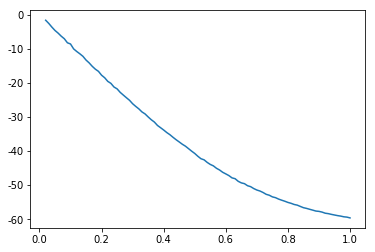

1298.1369941234589


In [14]:
RELAX_SWEEPS = 10000
sweeps = 10000
betaB = 0.01
betaE = 1
interval = 0.01 
x =[]
#y1 =[]
y2 = []
timex=time.time()
spin_array = init_spin_array()
for beta in np.arange(betaE, betaB,-interval):
    spin_array = IsingMC(beta,spin_array)
#plt.figure(1)
#plt.plot(x,y1)
plt.figure(2)
plt.plot(x,y2)
plt.show()
print (time.time()-timex)

In [15]:
import math
-np.sum(y2)*interval/60+math.log(2)

1.3118664472266119

In [134]:
Emin = -66
spin_array = init_spin_array()
spin_array_min = []
for beta in np.arange(1,2,0.1):
    for sweep in range(10000):
        for i in range(60):
            e = energy(spin_array, i)
            if e <= 0:
                spin_array[i] *= -1
            elif np.exp((-1.0 * e) * beta) > random.random():
                spin_array[i] *= -1      
        Enew = Total_energy(spin_array) 
        if Enew <= Emin:
            #print(spin_array)
            Emin = Enew
            spin_array_min = np.append(spin_array_min,spin_array,axis = 0)

In [135]:
len(spin_array_min)

2134500

In [136]:
spin_array_min.reshape(-1,60)

array([[ 1., -1.,  1., ...,  1., -1.,  1.],
       [ 1., -1.,  1., ...,  1.,  1., -1.],
       [-1.,  1.,  1., ...,  1., -1., -1.],
       ..., 
       [ 1., -1.,  1., ..., -1.,  1., -1.],
       [ 1., -1.,  1., ..., -1.,  1., -1.],
       [ 1., -1.,  1., ..., -1.,  1., -1.]])

In [153]:
def unique(a):
    order = np.lexsort(a.T)
    a = a[order]
    diff = np.diff(a, axis=0)
    ui = np.ones(len(a), 'bool')
    ui[1:] = (diff != 0).any(axis=1) 
    return a[ui]

In [137]:
def fast_unique(arr):      
    arr = np.sort(arr, axis=1)           
    tmp =  arr[np.lexsort(arr.T),:]
    tmp = tmp[np.append([True],np.any(np.diff(tmp,axis=0),1))]
    return tmp[np.lexsort((tmp[:, 1], tmp[:, 0]), axis=0)]

In [156]:
unique(spin_array_min.reshape(-1,60)).shape

(10710, 60)

In [169]:
fast_unique(spin_array_min.reshape(-1,60)).shape

(1, 60)

In [157]:
a = np.array([[1,1,1,2],[1,2,3,4],[2,1,3,4],[2,2,2,1]])

In [159]:
spin_array_min.reshape(-1,60)[0]

array([ 1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,
        1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
        1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,
       -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,
       -1., -1.,  1., -1., -1.,  1., -1.,  1.])

In [181]:
a = np.array([1,2,3,4])

In [187]:
for i in range(4):
    print(np.append((np.append(a[0:1],a[1:2]),a[2:4])))

TypeError: append() missing 1 required positional argument: 'values'

In [176]:
a = unique(spin_array_min.reshape(-1,60))[0]

In [180]:
for i in range(60):
    print(np.append(a[i:i+59],a[i]))

[ 1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1. -1.  1. -1. -1.  1.
 -1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.
  1. -1.  1. -1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1.
 -1.  1. -1.  1. -1.  1.]
[ 1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1.
  1.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1.
 -1.  1. -1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1. -1.
  1. -1.  1. -1. -1.  1.]
[-1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.
  1. -1.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1.
  1. -1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1. -1.  1.
 -1.  1. -1. -1. -1.]
[ 1. -1. -1.  1.  1. -1.  1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1.
 -1.  1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.
 -1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1.  1. -1.  1. -1.
  1. -1. -1.  1.]
[-1. -1.  1.  1. -1.  1.  1. -1.